# `pilercrpy` examples

This notebook contains worked examples of using the `pilercrpy` package.

The `pilercrpy` package must be installed for the examples in this notebook to work. You can install `pilercrpy` as follows:

```python
git clone git@github.com:widdowquinn/pilercrpy.git  # clone the repository
cd pilercrpy
python setup.py install
```

## importing packages

In [1]:
from pathlib import Path   # for working with filenames/filehandles

import numpy as np
import matplotlib.pyplot as plt

import pilercrpy

## 1. Read in a single `PILER-CR` output file

To read all arrays from a `PILER-CR` output file, open that file as a handle, and use the `pilercpy.parse()` function. This returns a list of `PilerArray` objects, one per predicted CRISPR array.

In [2]:
with open("../tests/fixtures/pilercr_output/2168.fasta.pilercr", "r") as ifh:
    arrays = list(pilercrpy.parse(ifh))
    
print(arrays)

[<pilercrpy.piler.PilerArray object at 0x7f8edd7f9c40>, <pilercrpy.piler.PilerArray object at 0x7f8ede3f3d30>]


## 2. Explore the arrays in a single `PILER-CR` output file

Each `PilerArray` object has attributes with useful information about the array.

In [3]:
array = arrays[1]  # select an array
print(f"{array.seqname=}")         # name of sequence carrying CRISPR array
print(f"{array.start_position=}")  # start position of array on sequence
print(f"{len(array)=}")            # length of array (in base pairs)
print(f"{array.spacer_len=}")      # length of array spacer sequence
print(f"{array.consensus=}")       # array consensus repeat sequence
print(f"{array.repeat_len=}")      # length of array repeat sequence

array.seqname='NODE_2_length_236594_cov_5.82525'
array.start_position=28973
len(array)=328
array.spacer_len=32
array.consensus='GTTCACTGCCGTATAGGCAGCTTAGAAA'
array.repeat_len=28


Each `PilerArray` contains individual spacers in the `.spacers` attribute. These are stored as a list of `PilerSpacer` objects.

In [4]:
array.spacers

Each `PilerSpacer` object has attributes with useful information.

In [5]:
spacer = array.spacers[0]
print(f"{spacer.position=}")    # position of spacer on sequence
print(f"{spacer.repeat_len=}")  # length of spacer repeat sequence
print(f"{spacer.identity=}")    # percentage identity of repeat to the consensus
print(f"{spacer.repeat=}")      # representation of repeat sequence (. means 'same as consensus')
print(f"{spacer.spacer=}")      # spacer sequence

spacer.position=28973
spacer.repeat_len=28
spacer.identity=100.0
spacer.repeat='............................'
spacer.spacer='TGGTCTTCACTCAACCCTTGCGCACTGGCCAC'


Some `PilerArray` attributes give useful information about all spacers in the array.

In [6]:
print(f"{array.num_spacers=}")                   # count of spacer sequences
print(f"{array.spacer_sequences=}")              # all spacer sequences
print(f"{array.unique_spacer_sequences=}")       # unique spacer sequences (no duplicates)
print(f"{len(array.unique_spacer_sequences)=}")  # total count of unique spacer sequences
print(f"{array.spacer_sequence_counts=}")        # count for each unique spacer sequence

array.num_spacers=6
array.spacer_sequences=['TGGTCTTCACTCAACCCTTGCGCACTGGCCAC', 'ACCTGGAAGACGCACTACGCCTGAATCCGCTG', 'TTGCTTTAACAACCACCGTCTGAACTCACTGT', 'CAGCCAGCTTATCAGGGGGCCATCAAGCCATC', 'AAGCAAATAGACTCCATATTTGAGCGTAACGG', 'ATCGCAGTGATGAAGATCCCCGCAGCCTCCCC']
array.unique_spacer_sequences={'TGGTCTTCACTCAACCCTTGCGCACTGGCCAC', 'TTGCTTTAACAACCACCGTCTGAACTCACTGT', 'ACCTGGAAGACGCACTACGCCTGAATCCGCTG', 'AAGCAAATAGACTCCATATTTGAGCGTAACGG', 'ATCGCAGTGATGAAGATCCCCGCAGCCTCCCC', 'CAGCCAGCTTATCAGGGGGCCATCAAGCCATC'}
len(array.unique_spacer_sequences)=6
array.spacer_sequence_counts=Counter({'TGGTCTTCACTCAACCCTTGCGCACTGGCCAC': 1, 'ACCTGGAAGACGCACTACGCCTGAATCCGCTG': 1, 'TTGCTTTAACAACCACCGTCTGAACTCACTGT': 1, 'CAGCCAGCTTATCAGGGGGCCATCAAGCCATC': 1, 'AAGCAAATAGACTCCATATTTGAGCGTAACGG': 1, 'ATCGCAGTGATGAAGATCCCCGCAGCCTCCCC': 1})


## 3. Read all `PILER-CR` output from a directory

If you have a directory of collated `PILER-CR` output, there are helper functions to make processing the data easier.

The `pilercrpy.read_arraydir()` function takes a `Path` to a directory containing `PILER-CR` output as its argument, and returns a dictionary keyed by `Path`, with values corresponding to the output of `pilercrpy.parse()`: a list of `PilerArray` objects.

In [7]:
arrays = pilercrpy.read_arraydir(Path("../tests/fixtures/pilercr_output/"))

# Print slightly formatted output
print("\n".join(sorted([f"{k.stem:25}:\t{v}" for k, v in arrays.items()])))

14205wC5_DM9_07.fasta    :	[<pilercrpy.piler.PilerArray object at 0x7f8ede420c40>, <pilercrpy.piler.PilerArray object at 0x7f8ede42ab20>]
2168.fasta               :	[<pilercrpy.piler.PilerArray object at 0x7f8ede41a8b0>, <pilercrpy.piler.PilerArray object at 0x7f8ede420a30>]
22873wB2_SCRI1030.fasta  :	[<pilercrpy.piler.PilerArray object at 0x7f8ede42af70>, <pilercrpy.piler.PilerArray object at 0x7f8ede4349a0>]
22873wG1_SCRI1027.fasta  :	[<pilercrpy.piler.PilerArray object at 0x7f8ede41ac10>]
22873wG6_SCRI1113.fasta  :	[<pilercrpy.piler.PilerArray object at 0x7f8ede41a820>]
6146.fasta               :	[<pilercrpy.piler.PilerArray object at 0x7f8ede41a7f0>, <pilercrpy.piler.PilerArray object at 0x7f8ede420100>]
7383.fasta               :	[<pilercrpy.piler.PilerArray object at 0x7f8ede4203a0>, <pilercrpy.piler.PilerArray object at 0x7f8ede420d90>]
DM48-09.fasta            :	[<pilercrpy.piler.PilerArray object at 0x7f8ede41ac40>, <pilercrpy.piler.PilerArray object at 0x7f8ede434160>, <piler

The `pilercrpy.read_unique_spacers_to_dfm()` function will read a directory of `PILER-CR` output files and return a `Pandas` dataframe with counts of each unique spacer sequence.

In [8]:
dfm = pilercrpy.read_unique_spacers_to_dfm(Path("../tests/fixtures/pilercr_output/"))
dfm

,AAAATCCGCACGGATGCACTGAAAAAGGAAAT,AAATCAGCCAGCAACTCATCAGGGTTTACCTC,AACACGCCGCGCGATTTTGTCCACAATGCGCA,AACCGTCGCTCGCTGGCCACTGTACGATTCGC,AACTGAATAAACTCGACTCAACGCAAGATGCA,AAGCAAATAGACTCCATATTTGAGCGTAACGG,AAGTACCTTCCAGTATCGATCGAGCTTCAACA,AATCAATGGCTCAGGGGATTCTACAACCCTAA,AATCGGAGCAAGTCATGCAGAGAAATCAAAAT,AATTATTAGCGCGTTCTAATACATGCCCTTTG,...,TTACGGACGCAATCTATGTGCCGTGTAACGAT,TTATGACCTTGCGGACGTGCAGCGATCATTTCA,TTATTTAATTAGTTTTGCGGCGTACTCAATAA,TTCCCATCTTGATAATCGGACGGGTTCAGGCT,TTCTTTATGGACAGTGTCCAGGTGGATATTTC,TTGAAATTAGTGACGTGAGCAGAATCGTAAAC,TTGCGATTGGCACCGTTAACCGCTCAGTGACC,TTGCTTTAACAACCACCGTCTGAACTCACTGT,TTTATCGTACCAACACGATCCTGAGTACTGGA,TTTGTCCTTGAGCCTGACCGCTTCCGCCATCG
filename,,,,,,,,,,,,,,,,,,,,,
14205wC5_DM9_07.fasta,1,0,1,3,0,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
2168.fasta,1,0,1,3,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
22873wB2_SCRI1030.fasta,0,1,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
22873wG1_SCRI1027.fasta,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22873wG6_SCRI1113.fasta,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6146.fasta,0,1,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0
7383.fasta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DM48-09.fasta,0,0,1,1,0,0,0,1,0,0,...,1,0,0,1,1,1,0,0,1,1


This enables ready calculations and visualisation for the collection of spacers.

In [9]:
dfm.sum()  # How often does each spacer sequence occur in the set of genomes?

AAAATCCGCACGGATGCACTGAAAAAGGAAAT    2
AAATCAGCCAGCAACTCATCAGGGTTTACCTC    2
AACACGCCGCGCGATTTTGTCCACAATGCGCA    5
AACCGTCGCTCGCTGGCCACTGTACGATTCGC    7
AACTGAATAAACTCGACTCAACGCAAGATGCA    2
                                   ..
TTGAAATTAGTGACGTGAGCAGAATCGTAAAC    5
TTGCGATTGGCACCGTTAACCGCTCAGTGACC    1
TTGCTTTAACAACCACCGTCTGAACTCACTGT    2
TTTATCGTACCAACACGATCCTGAGTACTGGA    2
TTTGTCCTTGAGCCTGACCGCTTCCGCCATCG    1
Length: 118, dtype: int64

Show a basic heatmap of the counts of CRISPR spacers in each file

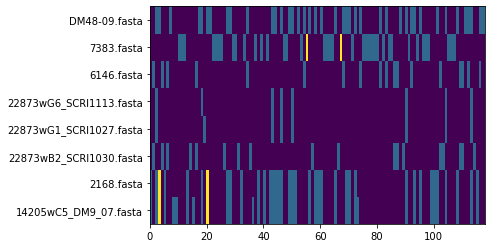

In [10]:
plt.pcolor(dfm)
plt.yticks(np.arange(0.5, len(dfm.index), 1), dfm.index)
plt.show()